In [1]:
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 5.7 MB/s eta 0:00:00


In [14]:

import matplotlib.pyplot as plt
import numpy as np
from datasets import load_dataset
import pandas as pd
from collections import Counter


In [3]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [4]:
dataset = load_dataset("SetFit/sst5")

README.md:   0%|          | 0.00/421 [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


train.jsonl:   0%|          | 0.00/1.32M [00:00<?, ?B/s]

dev.jsonl:   0%|          | 0.00/171k [00:00<?, ?B/s]

test.jsonl:   0%|          | 0.00/343k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8544 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1101 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2210 [00:00<?, ? examples/s]

In [5]:
print("Dataset Information:")
print(f"Train size: {len(dataset['train'])}")
print(f"Validation size: {len(dataset['validation'])}")
print(f"Test size: {len(dataset['test'])}")

Dataset Information:
Train size: 8544
Validation size: 1101
Test size: 2210


In [6]:
# 2. Class Distribution (Sentiment classes)
train_labels = dataset["train"]["label"]
val_labels = dataset["validation"]["label"]
test_labels = dataset["test"]["label"]

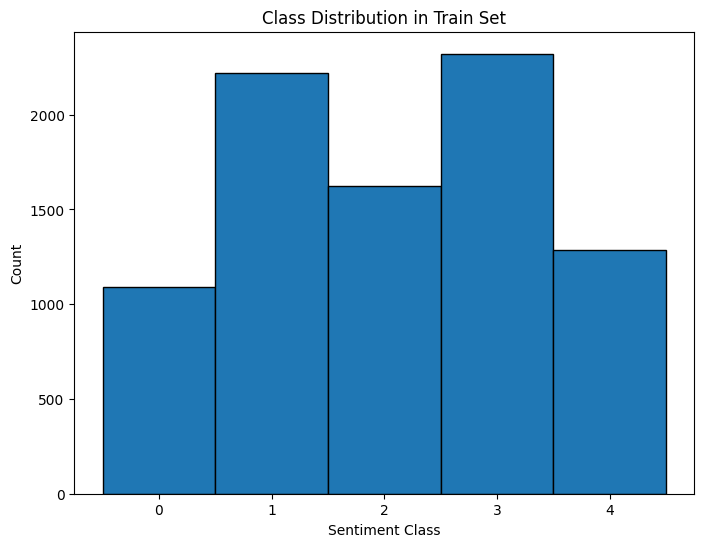

In [7]:
# Plot class distribution for the train set
plt.figure(figsize=(8, 6))
plt.hist(train_labels, bins=np.arange(6)-0.5, edgecolor="black")
plt.xticks(np.arange(5), ['0', '1', '2', '3', '4'])
plt.xlabel("Sentiment Class")
plt.ylabel("Count")
plt.title("Class Distribution in Train Set")
plt.show()

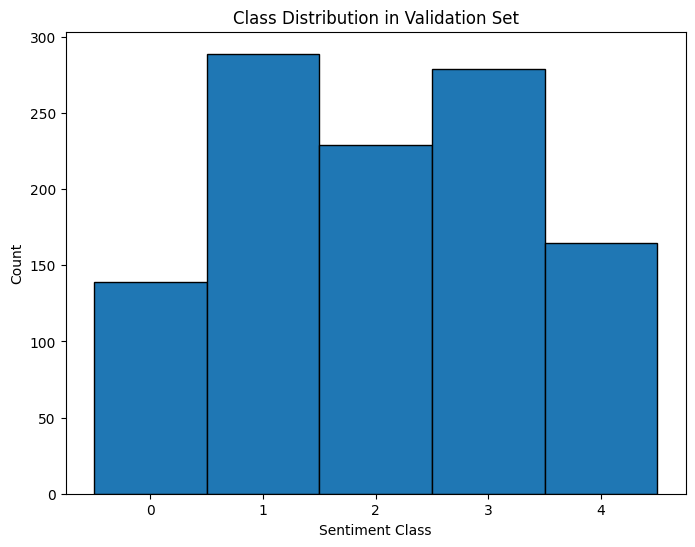

In [8]:
plt.figure(figsize=(8, 6))
plt.hist(val_labels, bins=np.arange(6)-0.5, edgecolor="black")
plt.xticks(np.arange(5), ['0', '1', '2', '3', '4'])
plt.xlabel("Sentiment Class")
plt.ylabel("Count")
plt.title("Class Distribution in Validation Set")
plt.show()

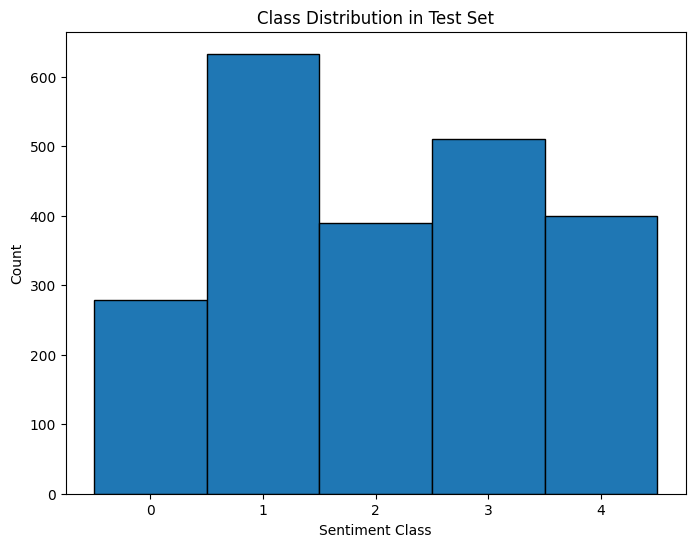

In [9]:
plt.figure(figsize=(8, 6))
plt.hist(test_labels, bins=np.arange(6)-0.5, edgecolor="black")
plt.xticks(np.arange(5), ['0', '1', '2', '3', '4'])
plt.xlabel("Sentiment Class")
plt.ylabel("Count")
plt.title("Class Distribution in Test Set")
plt.show()


In [10]:
# 3. Text Length Distribution
train_texts = dataset["train"]["text"]
val_texts = dataset["validation"]["text"]
test_texts = dataset["test"]["text"]

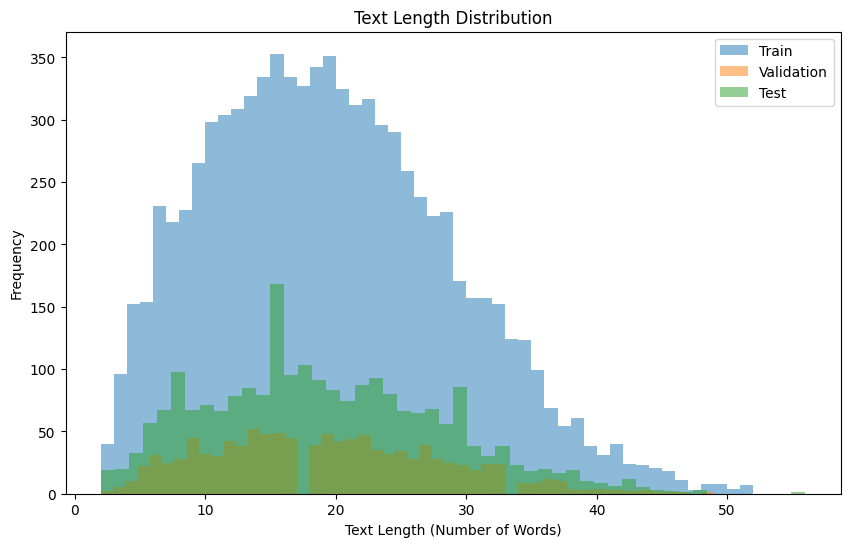

In [11]:
# Calculate the number of words in each text for all splits
train_text_lengths = [len(text.split()) for text in train_texts]
val_text_lengths = [len(text.split()) for text in val_texts]
test_text_lengths = [len(text.split()) for text in test_texts]

# Plot text length distribution for train, validation, and test sets
plt.figure(figsize=(10, 6))
plt.hist(train_text_lengths, bins=50, alpha=0.5, label="Train")
plt.hist(val_text_lengths, bins=50, alpha=0.5, label="Validation")
plt.hist(test_text_lengths, bins=50, alpha=0.5, label="Test")
plt.xlabel("Text Length (Number of Words)")
plt.ylabel("Frequency")
plt.title("Text Length Distribution")
plt.legend()
plt.show()

In [12]:
# 4. Sample Text Analysis
print("\nSample Texts from each Split:")
print(f"Sample from Train Set: {dataset['train'][0]['text']}")
print(f"Sample from Validation Set: {dataset['validation'][0]['text']}")
print(f"Sample from Test Set: {dataset['test'][0]['text']}")


Sample Texts from each Split:
Sample from Train Set: a stirring , funny and finally transporting re-imagining of beauty and the beast and 1930s horror films
Sample from Validation Set: in his first stab at the form , jacquot takes a slightly anarchic approach that works only sporadically .
Sample from Test Set: no movement , no yuks , not much of anything .


In [16]:
train_df = pd.DataFrame(dataset["train"])
class_statistics = train_df["label"].value_counts(normalize=True) * 100
print("\nClass Distribution Statistics in Train Set (in %):")
print(class_statistics)


Class Distribution Statistics in Train Set (in %):
label
3    27.176966
1    25.959738
2    19.007491
4    15.074906
0    12.780899
Name: proportion, dtype: float64


In [17]:
class_imbalance_threshold = 0.05  # Class imbalance threshold (5% representation)
low_representation_classes = class_statistics[class_statistics < class_imbalance_threshold]
print("\nClasses with less than 5% representation in the Train Set:")
print(low_representation_classes)


Classes with less than 5% representation in the Train Set:
Series([], Name: proportion, dtype: float64)


In [ ]:
num_samples_per_class = {i: sum(np.array(train_labels) == i) for i in range(5)}
print("\nNumber of Samples per Sentiment Class in Train Set:")
print(num_samples_per_class)

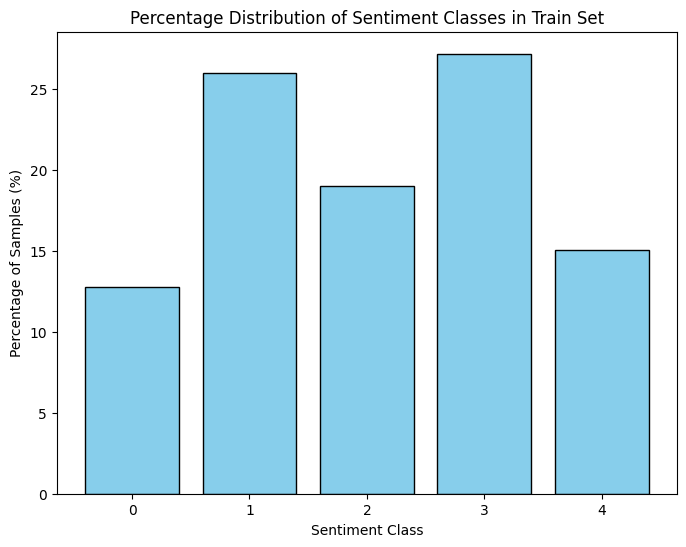

In [19]:
plt.figure(figsize=(8, 6))
plt.bar(class_statistics.index, class_statistics.values, color='skyblue', edgecolor='black')
plt.xticks(np.arange(5), ['0', '1', '2', '3', '4'])
plt.xlabel("Sentiment Class")
plt.ylabel("Percentage of Samples (%)")
plt.title("Percentage Distribution of Sentiment Classes in Train Set")
plt.show()